In [1]:
import numpy as np
import matplotlib.pyplot as plt
path ='/home/ngoc/Downloads/GCs/code/results/'
path1 ='/home/ngoc/Downloads/GCs/code/'
path2 ='/home/ngoc/Downloads/GCs/code/results_masses/'
path_z ='/home/ngoc/Downloads/GCs/code/results_z/'
path_model ='/home/ngoc/Downloads/GCs/code/results_model/'

 June 2: plot the comparision between M>=10^8 M_sun vs. M > 10^8 M_sun
 => confirmed there is no difference between these two results!

In [2]:
# CDM Mill Powerspectrum, M>= 10^8 Msun
ntrees = 10000 
m_max  = 1e13 #[M_sun]
m_min  = 1e8  #[M_sun]
n_mass = 50

data = np.zeros((ntrees,n_mass))

for i in range (0,ntrees):    
    N    = np.loadtxt(path2+'GCs-tree'+str(i+1)+'-func-of-mass-Mill-test.txt',usecols =(1))        
    data[i] = N
    
#mass is the same for all trees, so no need to put inside that loop    
mass_M_test = np.loadtxt(path2+'GCs-tree1-func-of-mass-Mill-test.txt',usecols =(0))    
#print(mass)

avg_M_test = np.zeros(n_mass)
for i in range(0,n_mass):
    avg_M_test[i] = np.mean(data[0:ntrees,i])

error_M_test = np.zeros(n_mass)
for i in range(0,n_mass):
    a0 = 0 
    for j in range(0,ntrees):
        a0 += (data[j,i] - avg_M_test[i])**2
    #error3[i] = np.sqrt(a0/((ntrees-1)*ntrees)) #standard error of the mean
    error_M_test[i] = np.sqrt(a0/ntrees) #standard deviation

In [3]:
#using cosmological parameters from Creasey (Planck) and get Pk by BBKS inside merger tree code, M>=10^8 Msun
ntrees = 10000 
m_max  = 1e13 #[M_sun]
m_min  = 1e8  #[M_sun]
n_mass = 50

data = np.zeros((ntrees,n_mass))

for i in range (0,ntrees):    
    N    = np.loadtxt(path2+'GCs-tree'+str(i+1)+'-func-of-mass-Creasey-test.txt',usecols =(1))        
    data[i] = N
    
#mass is the same for all trees, so no need to put inside that loop    
mass_C_test = np.loadtxt(path2+'GCs-tree1-func-of-mass-Creasey-test.txt',usecols =(0))    
#print(mass)

avg_C_test = np.zeros(n_mass)
for i in range(0,n_mass):
    avg_C_test[i] = np.mean(data[0:ntrees,i])

error_C_test = np.zeros(n_mass)
for i in range(0,n_mass):
    a0 = 0 
    for j in range(0,ntrees):
        a0 += (data[j,i] - avg_C_test[i])**2
    #error3[i] = np.sqrt(a0/((ntrees-1)*ntrees)) #standard error of the mean
    error_C_test[i] = np.sqrt(a0/ntrees) #standard deviation

In [4]:
#cosmological parameters from COCO WDM, test M>=10^8 M_sun
ntrees = 10000 
m_max  = 1e13 #[M_sun]
m_min  = 1e8  #[M_sun]
n_mass = 50

data = np.zeros((ntrees,n_mass))

for i in range (0,ntrees):    
    N    = np.loadtxt(path2+'GCs-tree'+str(i+1)+'-func-of-mass-COCO-test.txt',usecols =(1))        
    data[i] = N
    
#mass is the same for all trees, so no need to put inside that loop    
mass_CO_test = np.loadtxt(path2+'GCs-tree1-func-of-mass-COCO-test.txt',usecols =(0))    
#print(mass)

avg_CO_test = np.zeros(n_mass)
for i in range(0,n_mass):
    avg_CO_test[i] = np.mean(data[0:ntrees,i])

error_CO_test = np.zeros(n_mass)
for i in range(0,n_mass):
    a0 = 0 
    for j in range(0,ntrees):
        a0 += (data[j,i] - avg_CO_test[i])**2
    #error3[i] = np.sqrt(a0/((ntrees-1)*ntrees)) #standard error of the mean
    error_CO_test[i] = np.sqrt(a0/ntrees) #standard deviation

In [49]:
#data by Creasey 18
x3 = np.loadtxt(path1+'Creasey_Data.txt', usecols = (0))
y3 = np.loadtxt(path1+'Creasey_Data.txt', usecols = (1))

#data by observe
x4 = np.loadtxt(path1+'observe.txt', usecols = (0))
y4 = np.loadtxt(path1+'observe.txt', usecols = (1))

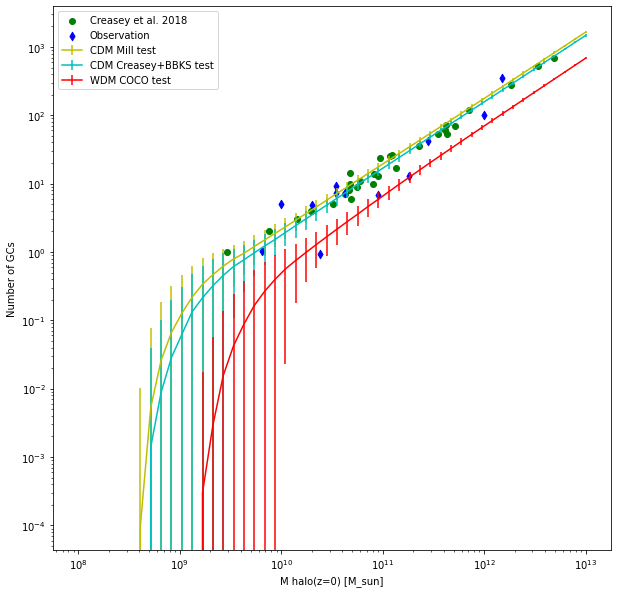

In [50]:
#observe data
name = ['SMC', 'Sgr-dSph', 'Fornax', 'VLM', 'NGC6822', 'NGC147', 'NGC185', 'NGC205', 'LMC', 'M33', 'MW', 'M31']

# compare the result of M>=10^8 M_sun (the ones named "test") vs M>10^8 M_sun
plt.figure(figsize=[10,10])
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("M halo(z=0) [M_sun]")
ax.set_ylabel("Number of GCs")    

#ax.errorbar(mass_M, avg_M, fmt='y-', yerr = error_M, label ='CDM Mill') 
ax.errorbar(mass_M_test, avg_M_test, fmt='y-', yerr = error_M_test, label ='CDM Mill test') 
#ax.errorbar(mass_C, avg_C, fmt='c-', yerr = error_C, label ='CDM Creasey+BBKS') 
ax.errorbar(mass_C_test, avg_C_test, fmt='c-', yerr = error_C_test, label ='CDM Creasey+BBKS test') 
#ax.errorbar(mass_CO, avg_CO, fmt='r-', yerr = error_CO, label ='WDM COCO') 
ax.errorbar(mass_CO_test, avg_CO_test, fmt='r-', yerr = error_CO_test, label ='WDM COCO test') 
#ax.set_title('10000 trees, error bars are standard deviation')

ax.scatter(x3,y3, color='g', label='Creasey et al. 2018')
ax.scatter(x4, y4, color='b',marker='d', label ='Observation')
#for i, txt in enumerate(name):
#    ax.annotate(txt, (x4[i], y4[i]))

#set scale as Fig.3 Creasey
#ax.set_xlim(1e9,8e12)
#ax.set_ylim(7e-1,7e2)

plt.legend()
#plt.savefig('N_GC_in_CDM_WDM_scale_Creasey.pdf')
#plt.savefig('N_GC_in_CDM_WDM.pdf')

June 8th: Interpret the results. Using Harris 13 catalog -> convert M_dyn (here assume M_dyn = M_stellar) to M_halo (Moster et al. 13) and plot all the data to compare. 

$            \frac{m_\star}{M_h} = 2N\left[ \left(\frac{M_h}{M_1}\right)^{-\beta} + \left(\frac{M_h}{M_1}\right)^\gamma\right]^{-1}$


where we have four parameters: $m$ is galaxy stellar mass, $M$ is halo mass of that galaxy, $M_1$ is the characteristic mass and $\beta, \gamma$ are the slope at low-mass end and high-mass end. These parameters are the functions of redshift $z$ as 
    \begin{align}
        \begin{split}
            & \log M_1(z) = M_{10} + M_{11} \frac{z}{z+1}, \\
            & N(z) = N_{10} + N_{11} \frac{z}{z+1}, \\
            & \beta(z) = \beta_{10} + \beta_{11} \frac{z}{z+1}, \\
            & \gamma(z) = \gamma_{10} + \gamma_{11} \frac{z}{z+1}. 
        \end{split}
    \end{align}
    
   

In [51]:
#solve with fsolve for input value of m_stellar
from scipy.optimize import fsolve 

June 9th: perhaps using visual V-band absolute magnitute to convert M_V -> M_stellar -> M_halo is much better!

by using absolute V-band magnitude $M_V$ given by Harris 13 catalog, we can convert it to luminosity $L$, 
    \begin{align}
        M_V - M_{V,\odot} = -2.5\log_{10} \frac{L}{L_\odot}, 
    \end{align}
    
The V-band luminosity therefore:
    \begin{align}
        L_V = 10^{ 0.4(M_{V,\odot} - M_{V})}  L_\odot. 
    \end{align}
    
    
So, we get $M_\star$ with the mass-to-light ratio, as
   \begin{align}
        \frac{M_\star}{L_V}= \Upsilon \frac{M_\odot} {L_\odot} .
    \end{align}
    
    
After that, using the same abundance matching as in Moster13, we get the halo mass of each galaxy.

In [52]:
#loading data from file
M_V      = np.loadtxt(path1+'GC_cat_Harris13.txt', usecols=(9))
N_GC_tot = np.loadtxt(path1+'GC_cat_Harris13.txt', usecols=(13)) 

In [53]:
#Paramters adopted from Moster et al. 13, table 1
M_10     = 11.59
M_11     = 1.195
N_10     = 0.0351
N_11     = -0.0247
beta_10  = 1.376
beta_11  = -0.826
gamma_10 = 0.608
gamma_11 = 0.329

In [54]:
#calculate the parameters(z) for SHM relation
z = 0

log_M1 = M_10 + M_11*z/(z+1)
M_1    = 10**log_M1
NN     = N_10 + N_11*z/(z+1)
beta   = beta_10 + beta_11*z/(z+1)
gamma  = gamma_10 + gamma_11*z/(z+1)

#print(M_1,N,beta,gamma)

In [55]:
M_Vsun  = 4.83                   #abs mag of V-band of the sun
upsilon = 1                    #mass-to-light ratio V-band (Creasey18 = 1, Baumgardt = 1.83 +- 0.24)

L = 10**(0.4*(M_Vsun - M_V))     #[L_sun]
M_stellar_arr = L*upsilon        #[M_sun]
#print(M_stellar)

In [56]:
i = 0
M_guess = 1e10
M_h_array = np.zeros(len(M_V))

for m_stellar in M_stellar_arr:
    func = lambda M_h : m_stellar - 2*NN*M_h/((M_h/M_1)**(-beta) + (M_h/M_1)**gamma)  
    M_h_array[i] = fsolve(func,M_guess)
    i += 1    
#print(M_h_array)

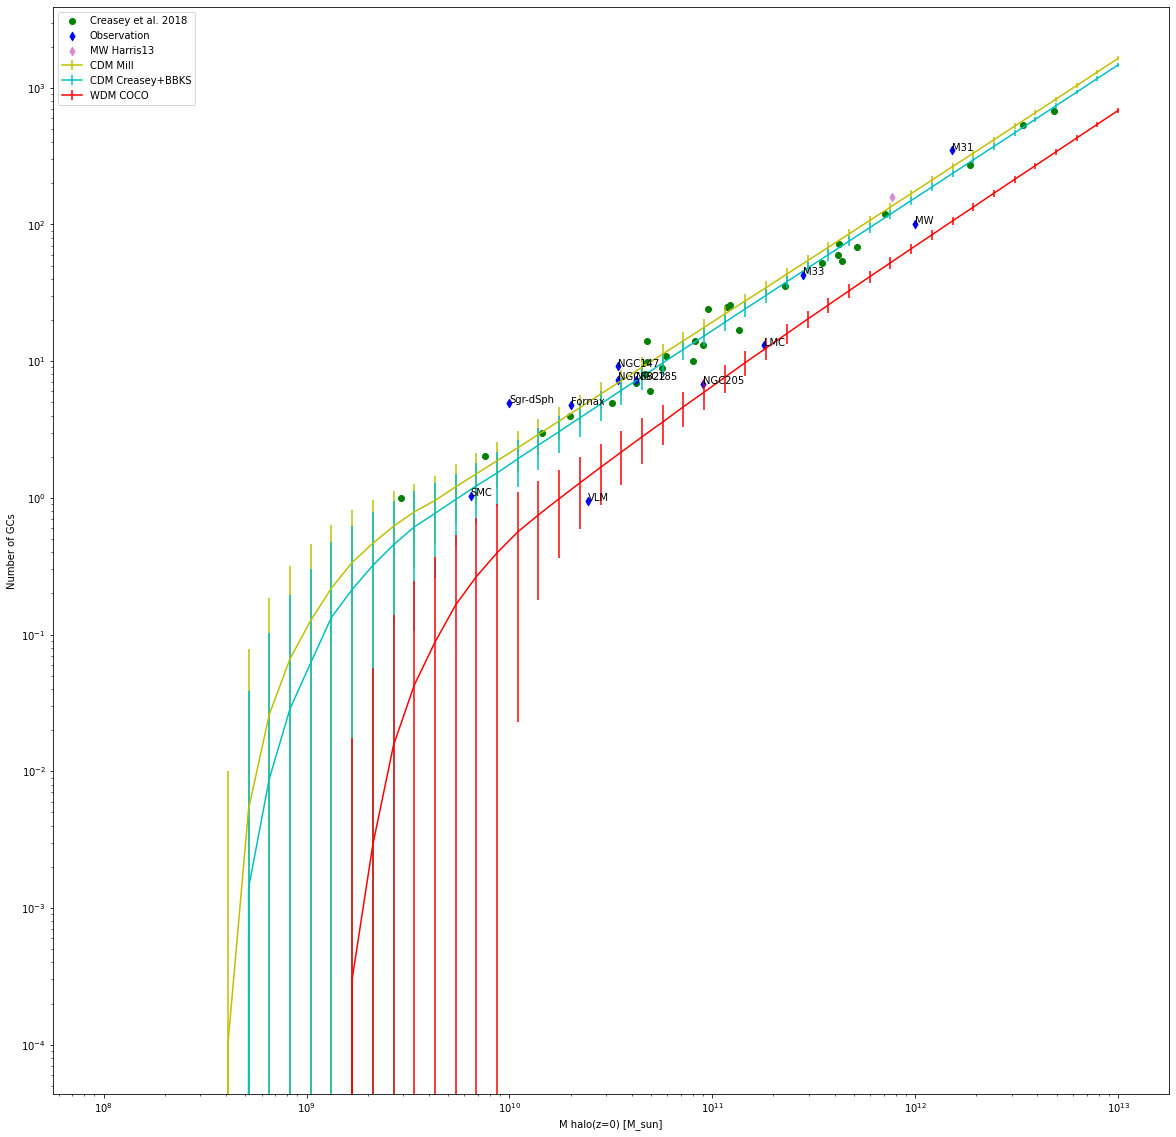

In [57]:
# compare the result to Harris catalog (all GCs)
plt.figure(figsize=[20,20])
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("M halo(z=0) [M_sun]")
ax.set_ylabel("Number of GCs")    

ax.errorbar(mass_M_test, avg_M_test, fmt='y-', yerr = error_M_test, label ='CDM Mill') 
ax.errorbar(mass_C_test, avg_C_test, fmt='c-', yerr = error_C_test, label ='CDM Creasey+BBKS') 
ax.errorbar(mass_CO_test, avg_CO_test, fmt='r-', yerr = error_CO_test, label ='WDM COCO') 

name = ['SMC', 'Sgr-dSph', 'Fornax', 'VLM', 'NGC6822', 'NGC147', 'NGC185', 'NGC205', 'LMC', 'M33', 'MW', 'M31']

ax.scatter(x3,y3, color='g', label='Creasey et al. 2018')
ax.scatter(x4, y4, color='b',marker='d', label ='Observation')
ax.scatter(M_h_array[0], N_GC_tot[0], color='#d68bd4', marker='d', label ='MW Harris13')
#ax.scatter(M_h_array, N_GC_tot, color='#d68bd4', marker='d', label ='Harris13 (N_GC tot)')

for i, txt in enumerate(name):
    ax.annotate(txt, (x4[i], y4[i]))

plt.legend()

To take only blue GCs, we use the formula from Harris 15 that the fraction of blue GCs fblue is 

$f_{blue} = 1 \qquad \qquad \ \ $ if $M_h \le 10^{10} M_\odot$

$f_{blue} =  \left(\frac{M_h}{10^{7} M_\odot}\right)^{-0.07}$ if $10^{10} M_\odot < M_h \le 10^{13} M_\odot$

$f_{blue} = 0.5 \qquad \qquad $ if $M_h \gt 10^{13} M_\odot$

In [58]:
N_bGC    = np.full_like(N_GC_tot,0)

In [59]:
#another code that update the fblue function better

fblue = lambda M_h: (M_h/1e10)**(-0.07) if (M_h > 1e10 and M_h <= 1e13) else 1 if (M_h <= 1e10) else 0.5

for i in range (1,len(N_GC_tot)):
    N_bGC[i] = N_GC_tot[i]*fblue(M_h_array[i])

N_bGC[0] = 100    

Creasey18 claimed they took this relation in Harris15 but it showed difference from Harris 15
\begin{align}
        f_{blue} = \min \left[  \left(\frac{M_h}{10^{7} M_\odot}\right),1
        \right]^{-0.07} 
    \end{align}

In [60]:
fblue    = M_h_array/1e7 
N_bGC_C  = np.full_like(N_GC_tot,0)
for i in range (1,len(N_bGC)-1):
    N_bGC_C[i] = N_GC_tot[i]*min(fblue[i]**(-0.07),1)
                     
N_bGC_C[0] = 100                #for MW only
#print(N_bGC)

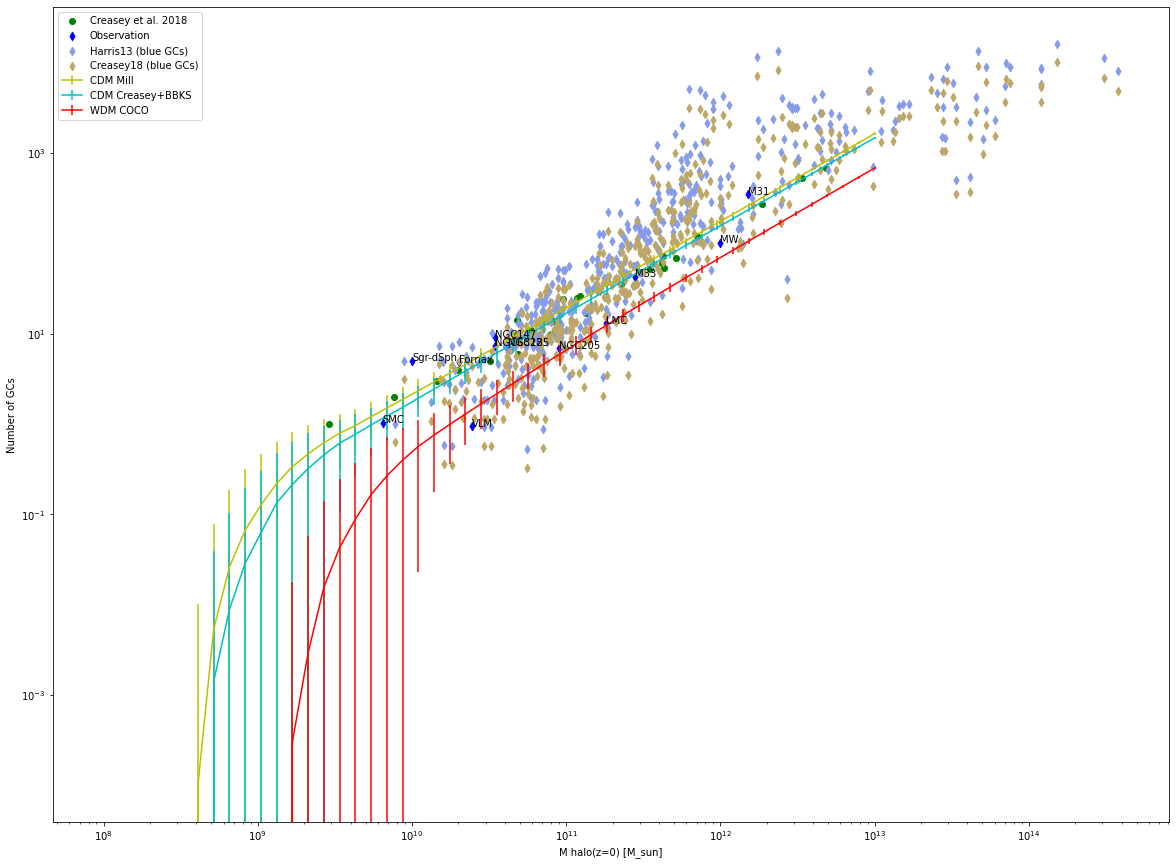

In [61]:
# compare the result to Harris catalog (all GCs)
plt.figure(figsize=[20,15])
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("M halo(z=0) [M_sun]")
ax.set_ylabel("Number of GCs")    

ax.errorbar(mass_M_test, avg_M_test, fmt='y-', yerr = error_M_test, label ='CDM Mill') 
ax.errorbar(mass_C_test, avg_C_test, fmt='c-', yerr = error_C_test, label ='CDM Creasey+BBKS') 
ax.errorbar(mass_CO_test, avg_CO_test, fmt='r-', yerr = error_CO_test, label ='WDM COCO') 

name = ['SMC', 'Sgr-dSph', 'Fornax', 'VLM', 'NGC6822', 'NGC147', 'NGC185', 'NGC205', 'LMC', 'M33', 'MW', 'M31']

ax.scatter(x3,y3, color='g', label='Creasey et al. 2018')
ax.scatter(x4, y4, color='b',marker='d', label ='Observation')
#ax.scatter(M_h_array[0], N_bGC[0], color='#879ce8', marker='d', label ='MW Harris13')
ax.scatter(M_h_array, N_bGC, color='#879ce8', marker='d', label ='Harris13 (blue GCs)')
ax.scatter(M_h_array, N_bGC_C, color='#bda666', marker='d', label ='Creasey18 (blue GCs)')
#ax.scatter(M_h_array, N_GC_tot, color='#d68bd4', marker='d', label ='Harris13 (tot GCs)')

for i, txt in enumerate(name):
    ax.annotate(txt, (x4[i], y4[i]))

plt.legend()

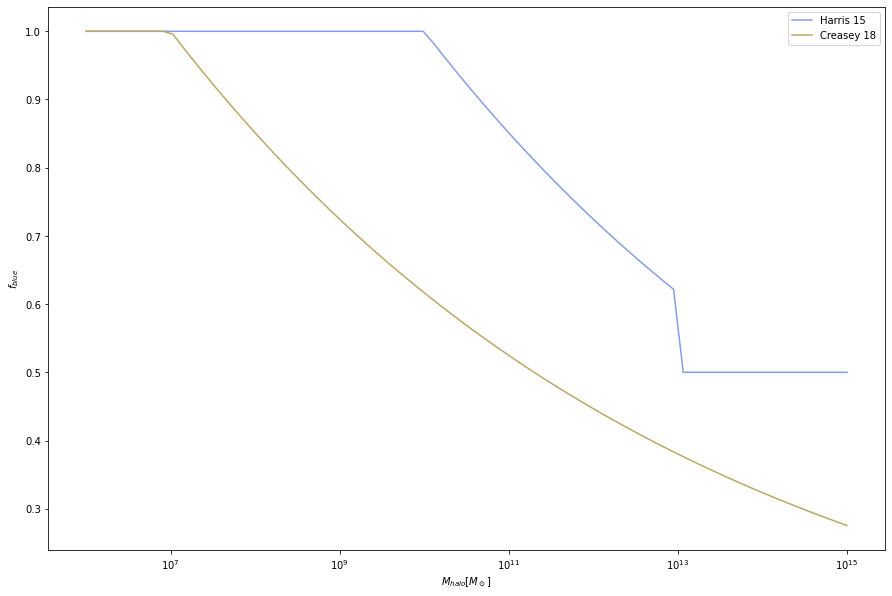

In [62]:
#compare fblue of the two papers Harris 15 and Creasey 18
fblue_H15 = lambda M_h: (M_h/1e10)**(-0.07) if (M_h > 1e10 and M_h <= 1e13) else 1 if M_h <= 1e10 else 0.5
fblue_C18 = lambda M_h: min((M_h/1e7)**(-0.07),1) 

m_test = np.logspace(6,15,80)
#print(m_test)
fb_H = np.zeros(80)
fb_C = np.zeros(80)

i = 0
for m in m_test:
    fb_H[i] = fblue_H15(m)
    fb_C[i] = fblue_C18(m)
    i      += 1
    
plt.figure(figsize=[15,10])
plt.semilogx(m_test,fb_H,'#879ce8', label='Harris 15')
plt.plot(m_test,fb_C,'#bda666', label='Creasey 18')
plt.xlabel('$M_{halo} [M_\odot]$')
plt.ylabel('$f_{blue}$')
plt.legend()
#plt.savefig('C_H_fblue.pdf')

June 10th tasks:

    - Plot the total GCs inside DM halos at z=0, using our model (sum up the GCs formed at different z till the z_threshold).
    
    - Data in results_model, 1st column: log10(M_halo) [M_sun] at z=0, 2nd column: total number of GCs formed inside that DM halo, at different z 

In [8]:
ntrees       = 1000 
m_max        = 1e13 #[M_sun]
m_min        = 2e8  #[M_sun]
n_mass       = 48
m_array      = np.loadtxt(path_model+'GCs-tree1-model-Mill.txt',usecols =(0))
mass         = 10**m_array
data_M       = np.zeros((ntrees,n_mass))
data_CO      = np.zeros((ntrees,n_mass))
data_Creasey = np.zeros((ntrees,n_mass))


In [9]:
for i in range (0,ntrees):    
    N    = np.loadtxt(path_model+'GCs-tree'+str(i+1)+'-model-Mill.txt',usecols =(1))        
    data_M[i] = N
    
avg_M = np.zeros(n_mass)
for i in range(0,n_mass):
    avg_M[i] = np.mean(data_M[0:ntrees,i])

error_M = np.zeros(n_mass)
for i in range(0,n_mass):
    a0 = 0 
    for j in range(0,ntrees):
        a0 += (data_M[j,i] - avg_M[i])**2
    #error3[i] = np.sqrt(a0/((ntrees-1)*ntrees)) #standard error of the mean
    error_M[i] = np.sqrt(a0/ntrees) #standard deviation

In [10]:
for i in range (0,ntrees):    
    N    = np.loadtxt(path_model+'GCs-tree'+str(i+1)+'-model-COCO.txt',usecols =(1))        
    data_CO[i] = N
    
avg_CO = np.zeros(n_mass)
for i in range(0,n_mass):
    avg_CO[i] = np.mean(data_CO[0:ntrees,i])

error_CO = np.zeros(n_mass)
for i in range(0,n_mass):
    a0 = 0 
    for j in range(0,ntrees):
        a0 += (data_CO[j,i] - avg_CO[i])**2
    #error3[i] = np.sqrt(a0/((ntrees-1)*ntrees)) #standard error of the mean
    error_CO[i] = np.sqrt(a0/ntrees) #standard deviation

In [11]:
for i in range (0,ntrees):    
    N    = np.loadtxt(path_model+'GCs-tree'+str(i+1)+'-model-Creasey.txt',usecols =(1))        
    data_Creasey[i] = N
    
avg_Creasey = np.zeros(n_mass)
for i in range(0,n_mass):
    avg_Creasey[i] = np.mean(data_Creasey[0:ntrees,i])

error_Creasey = np.zeros(n_mass)
for i in range(0,n_mass):
    a0 = 0 
    for j in range(0,ntrees):
        a0 += (data_Creasey[j,i] - avg_Creasey[i])**2
    #error3[i] = np.sqrt(a0/((ntrees-1)*ntrees)) #standard error of the mean
    error_Creasey[i] = np.sqrt(a0/ntrees) #standard deviation

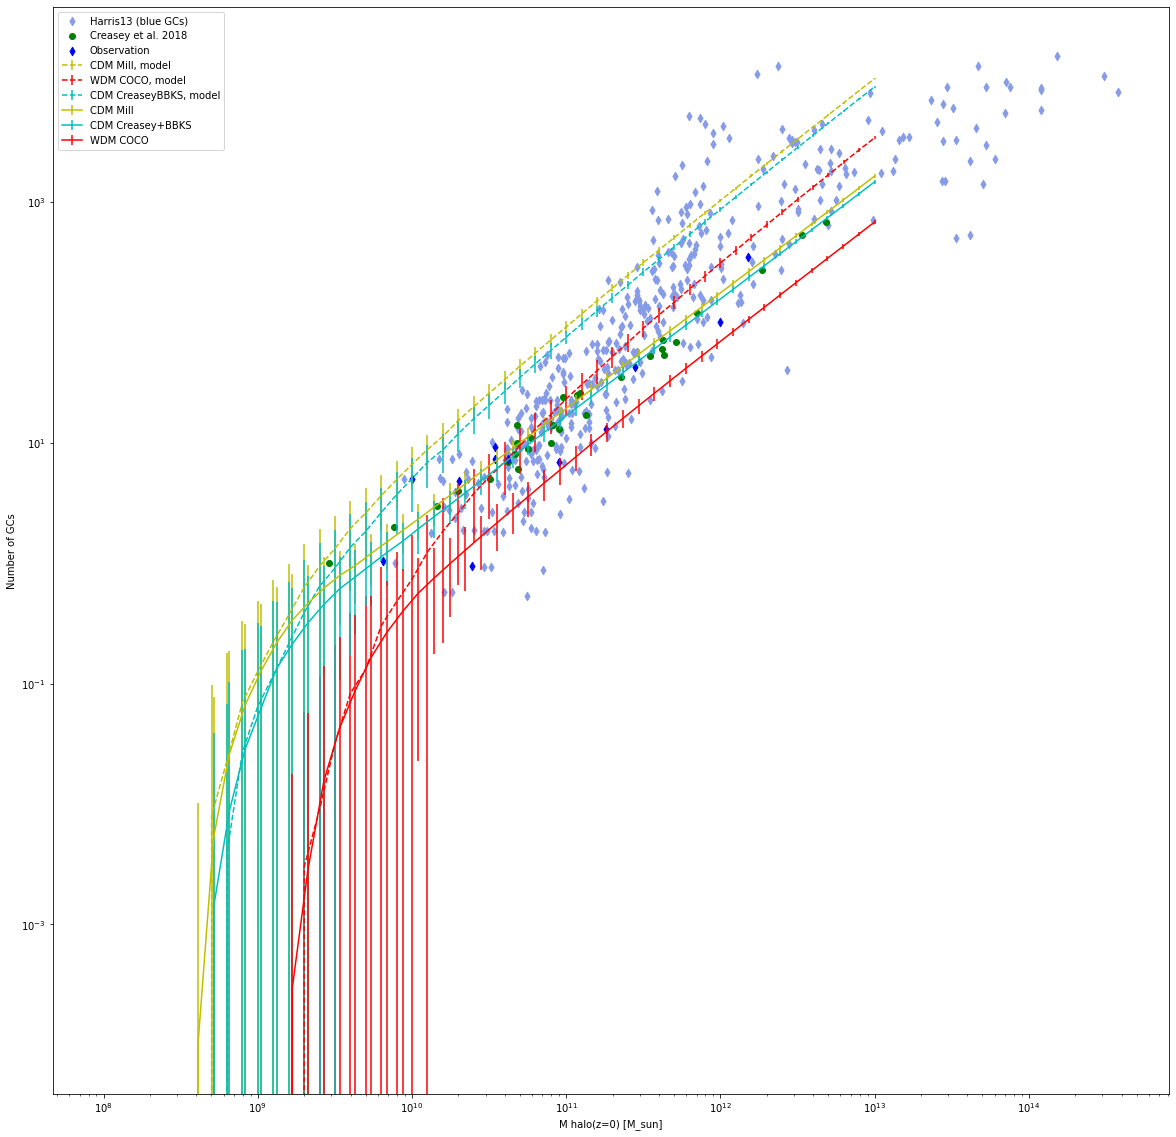

In [67]:
# plot the number of GCs results in our model and in Creasey model
#observe data
name = ['SMC', 'Sgr-dSph', 'Fornax', 'VLM', 'NGC6822', 'NGC147', 'NGC185', 'NGC205', 'LMC', 'M33', 'MW', 'M31']

# compare the result of M>=10^8 M_sun (the ones named "test") vs M>10^8 M_sun
plt.figure(figsize=[20,20])
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("M halo(z=0) [M_sun]")
ax.set_ylabel("Number of GCs")    

ax.errorbar(mass, avg_M, fmt='y--', yerr = error_M, label ='CDM Mill, model') 
ax.errorbar(mass, avg_CO, fmt='r--', yerr = error_CO, label ='WDM COCO, model') 
ax.errorbar(mass, avg_Creasey, fmt='c--', yerr = error_Creasey, label ='CDM CreaseyBBKS, model') 
ax.errorbar(mass_M_test, avg_M_test, fmt='y-', yerr = error_M_test, label ='CDM Mill') 
ax.errorbar(mass_C_test, avg_C_test, fmt='c-', yerr = error_C_test, label ='CDM Creasey+BBKS') 
ax.errorbar(mass_CO_test, avg_CO_test, fmt='r-', yerr = error_CO_test, label ='WDM COCO') 
#ax.set_title('10000 trees, error bars are standard deviation')
ax.scatter(M_h_array, N_bGC, color='#879ce8', marker='d', label ='Harris13 (blue GCs)')

ax.scatter(x3,y3, color='g', label='Creasey et al. 2018')
ax.scatter(x4, y4, color='b',marker='d', label ='Observation')
#for i, txt in enumerate(name):
#    ax.annotate(txt, (x4[i], y4[i]))

#set scale as Fig.3 Creasey
#ax.set_xlim(1e9,8e12)
#ax.set_ylim(7e-1,7e2)

plt.legend()
#plt.savefig('N_GC_in_CDM_WDM_scale_Creasey.pdf')
#plt.savefig('N_GC_in_CDM_WDM.pdf')

- extract data from Harris+Atlas catalog (all GCs)

- data from Atlas are named by (RA,DEC) -> compare to Harris13 catalog by (RA,DEC) positions

(calculated in Atlas-data.ipynb, saved in file data_Atlas_Harris13.txt)

In [68]:
#load data from Harris+Atlas
M_HA    = np.loadtxt(path1+"/data_Atlas_Harris13.txt",usecols=(0))
N_GC_HA = np.loadtxt(path1+"/data_Atlas_Harris13.txt",usecols=(1))

In [69]:
N_bGC_HA = np.full_like(N_GC_HA,0)
fblue = lambda M_h: (M_h/1e10)**(-0.07) if (M_h > 1e10 and M_h <= 1e13) else 1 if (M_h <= 1e10) else 0.5

for i in range (1,len(N_GC_HA)):
    N_bGC_HA[i] = N_GC_HA[i]*fblue(M_HA[i])


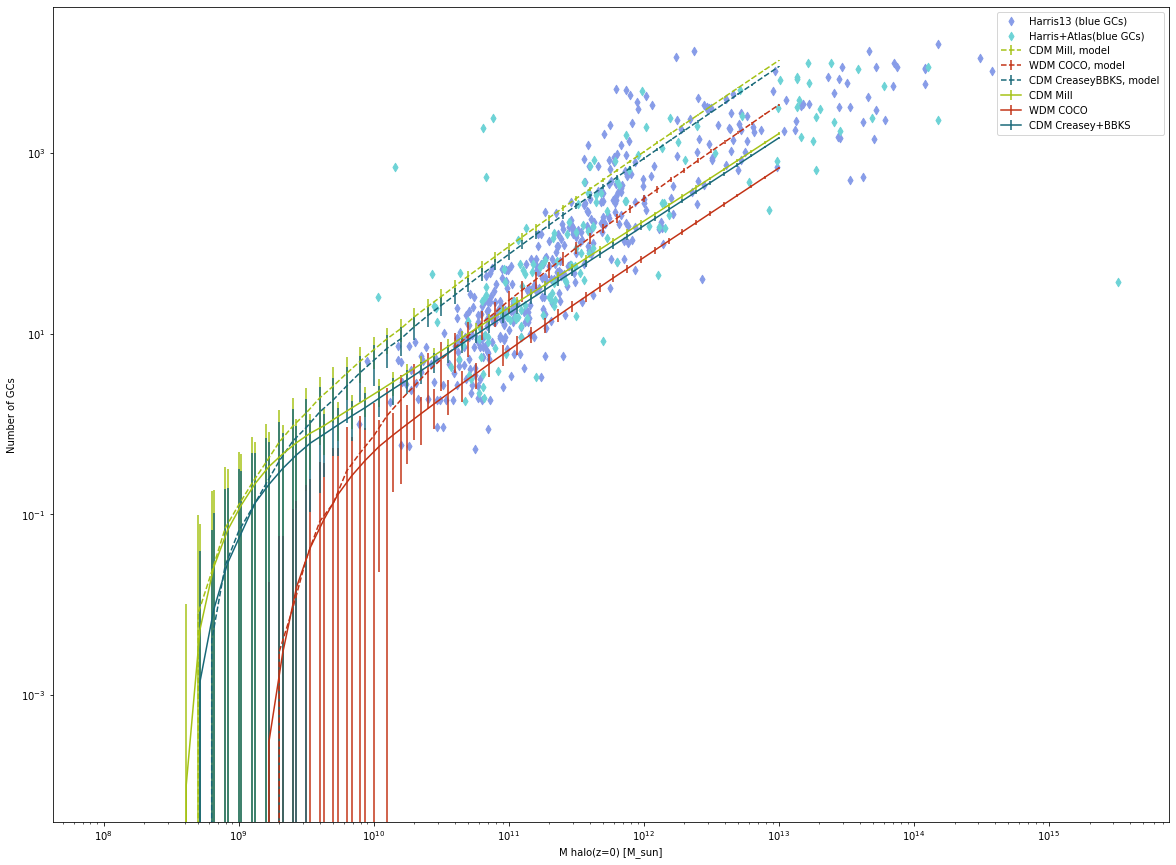

In [78]:
# compare the result to Harris+Atlas catalog (all GCs)
plt.figure(figsize=[20,15])
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("M halo(z=0) [M_sun]")
ax.set_ylabel("Number of GCs")    

ax.errorbar(mass, avg_M,       color = '#a5c215', fmt ='--', yerr = error_M,       label ='CDM Mill, model') 
ax.errorbar(mass, avg_CO,      color = '#c23215', fmt ='--', yerr = error_CO,      label ='WDM COCO, model') 
ax.errorbar(mass, avg_Creasey, color = '#186878', fmt ='--', yerr = error_Creasey, label ='CDM CreaseyBBKS, model') 

ax.errorbar(mass_M_test, avg_M_test,   color = '#a5c215', yerr = error_M_test,  label ='CDM Mill') 
ax.errorbar(mass_CO_test, avg_CO_test, color = '#c23215', yerr = error_CO_test, label ='WDM COCO') 
ax.errorbar(mass_C_test, avg_C_test,   color = '#186878', yerr = error_C_test,  label ='CDM Creasey+BBKS') 

name = ['SMC', 'Sgr-dSph', 'Fornax', 'VLM', 'NGC6822', 'NGC147', 'NGC185', 'NGC205', 'LMC', 'M33', 'MW', 'M31']

#ax.scatter(x3,y3, color='g', label='Creasey et al. 2018')
#ax.scatter(x4, y4, color='b',marker='d', label ='Observation')
ax.scatter(M_h_array, N_bGC, color='#879ce8', marker='d', label ='Harris13 (blue GCs)')
#ax.scatter(M_h_array, N_GC_tot, color='#21158c', marker='d', label ='Harris13 (tot GCs)')
ax.scatter(M_HA, N_bGC_HA, color='#6dd3d6', marker='d', label ='Harris+Atlas(blue GCs)')
#ax.scatter(M_HA, N_GC_HA, color='#097a7d', marker='d', label ='Harris+Atlas(tot GCs)')


#for i, txt in enumerate(name):
#    ax.annotate(txt, (x4[i], y4[i]))
plt.legend()
#plt.savefig('model-blueGCs.pdf')

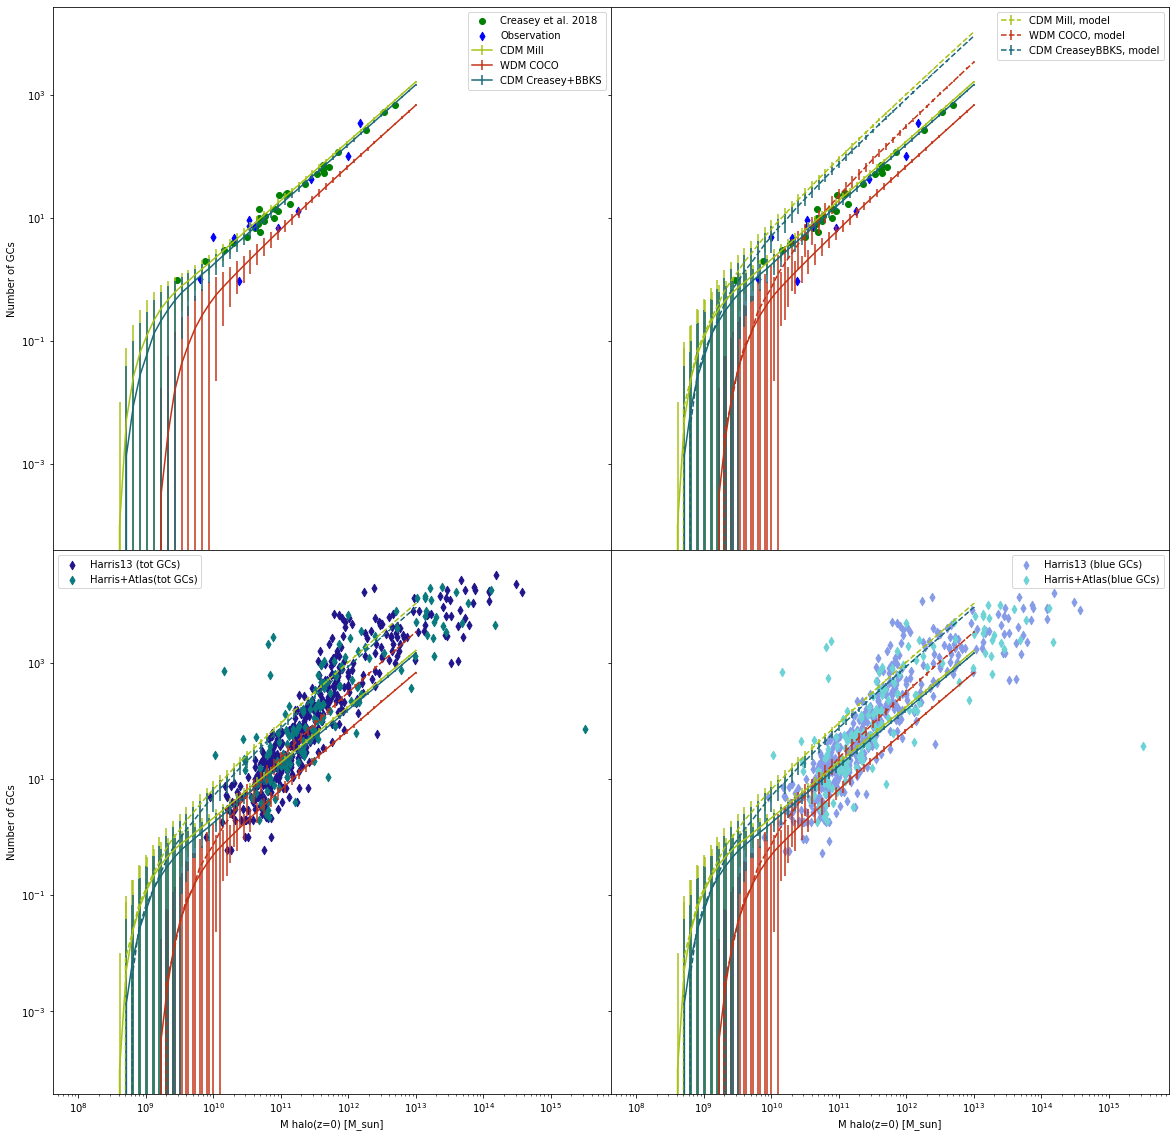

In [110]:
#plot F-corrfunc with results from Linear theory, theory cut, Corrfunc
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax3), (ax4, ax2) = gs.subplots(sharex='col', sharey='row')

ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.errorbar(mass, avg_M,       color = '#a5c215', fmt ='--', yerr = error_M,       label ='CDM Mill, model') 
#ax1.errorbar(mass, avg_CO,      color = '#c23215', fmt ='--', yerr = error_CO,      label ='WDM COCO, model') 
#ax1.errorbar(mass, avg_Creasey, color = '#186878', fmt ='--', yerr = error_Creasey, label ='CDM CreaseyBBKS, model') 
ax1.errorbar(mass_M_test, avg_M_test,   color = '#a5c215', yerr = error_M_test,  label ='CDM Mill') 
ax1.errorbar(mass_CO_test, avg_CO_test, color = '#c23215', yerr = error_CO_test, label ='WDM COCO') 
ax1.errorbar(mass_C_test, avg_C_test,   color = '#186878', yerr = error_C_test,  label ='CDM Creasey+BBKS') 
ax1.scatter(x3,y3, color='g', label='Creasey et al. 2018')
ax1.scatter(x4, y4, color='b',marker='d', label ='Observation')
ax1.legend()
#ax1.set_xlabel("M halo(z=0) [M_sun]")
ax1.set_ylabel("Number of GCs")  


ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.errorbar(mass, avg_M,       color = '#a5c215', fmt ='--', yerr = error_M)#,       label ='CDM Mill, model') 
ax2.errorbar(mass, avg_CO,      color = '#c23215', fmt ='--', yerr = error_CO)#,      label ='WDM COCO, model') 
ax2.errorbar(mass, avg_Creasey, color = '#186878', fmt ='--', yerr = error_Creasey)#, label ='CDM CreaseyBBKS, model') 
ax2.errorbar(mass_M_test, avg_M_test,   color = '#a5c215', yerr = error_M_test )#,  label ='CDM Mill') 
ax2.errorbar(mass_CO_test, avg_CO_test, color = '#c23215', yerr = error_CO_test )#, label ='WDM COCO') 
ax2.errorbar(mass_C_test, avg_C_test,   color = '#186878', yerr = error_C_test )#,  label ='CDM Creasey+BBKS') 
ax2.scatter(M_h_array, N_bGC, color='#879ce8', marker='d', label ='Harris13 (blue GCs)')
ax2.scatter(M_HA, N_bGC_HA, color='#6dd3d6', marker='d', label ='Harris+Atlas(blue GCs)')
ax2.set_xlabel("M halo(z=0) [M_sun]")
ax2.legend()

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.errorbar(mass, avg_M,       color = '#a5c215', fmt ='--', yerr = error_M,       label ='CDM Mill, model') 
ax3.errorbar(mass, avg_CO,      color = '#c23215', fmt ='--', yerr = error_CO,      label ='WDM COCO, model') 
ax3.errorbar(mass, avg_Creasey, color = '#186878', fmt ='--', yerr = error_Creasey, label ='CDM CreaseyBBKS, model') 
ax3.errorbar(mass_M_test, avg_M_test,   color = '#a5c215', yerr = error_M_test)#,  label ='CDM Mill') 
ax3.errorbar(mass_CO_test, avg_CO_test, color = '#c23215', yerr = error_CO_test)#, label ='WDM COCO') 
ax3.errorbar(mass_C_test, avg_C_test,   color = '#186878', yerr = error_C_test)#,  label ='CDM Creasey+BBKS') 
ax3.scatter(x3,y3, color='g')#, label='Creasey et al. 2018')
ax3.scatter(x4, y4, color='b',marker='d')#, label ='Observation')
ax3.legend()




ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.errorbar(mass, avg_M,       color = '#a5c215', fmt ='--', yerr = error_M)#,       label ='CDM Mill, model') 
ax4.errorbar(mass, avg_CO,      color = '#c23215', fmt ='--', yerr = error_CO)#,      label ='WDM COCO, model') 
ax4.errorbar(mass, avg_Creasey, color = '#186878', fmt ='--', yerr = error_Creasey)#, label ='CDM CreaseyBBKS, model') 
ax4.errorbar(mass_M_test, avg_M_test,   color = '#a5c215', yerr = error_M_test)#,  label ='CDM Mill') 
ax4.errorbar(mass_CO_test, avg_CO_test, color = '#c23215', yerr = error_CO_test)#, label ='WDM COCO') 
ax4.errorbar(mass_C_test, avg_C_test,   color = '#186878', yerr = error_C_test)#,  label ='CDM Creasey+BBKS') 
ax4.scatter(M_h_array, N_GC_tot, color='#21158c', marker='d', label ='Harris13 (tot GCs)')
ax4.scatter(M_HA, N_GC_HA, color='#097a7d', marker='d', label ='Harris+Atlas(tot GCs)')
ax4.set_xlabel("M halo(z=0) [M_sun]")
ax4.set_ylabel("Number of GCs")    
ax4.legend()


leg = ax.legend(['abc'], loc = 'center left', bbox_to_anchor = (1.0, 0.5))
#plt.savefig('model_HA_compare.pdf',bbox_inches='tight')